In [55]:
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
name = "test-latency5"

df_prob = pd.read_csv(f'data/{name}-prob.log')
df_basic = pd.read_csv(f'data/{name}-basic.log')

In [57]:
# Print the size of the df
print(df_prob.shape)
print(df_basic.shape)

(3690, 17)
(3690, 17)


In [58]:
df_prob.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1674752279027,704,HTTP Request 2,200,OK,ThreadGroup2 2-3,text,True,NaN,423,274,3,3,http://10.10.1.2:1323/invoke/hash,700,0,1
1,1674752279782,19,HTTP Request 2,200,OK,ThreadGroup2 2-4,text,True,NaN,405,274,3,3,http://10.10.1.2:1323/invoke/hash,19,0,0
2,1674752280489,18,HTTP Request 2,200,OK,ThreadGroup2 2-5,text,True,NaN,404,274,3,3,http://10.10.1.2:1323/invoke/hash,18,0,2
3,1674752280616,14,HTTP Request 2,200,OK,ThreadGroup2 2-6,text,True,NaN,404,274,3,3,http://10.10.1.2:1323/invoke/hash,14,0,2
4,1674752280976,16,HTTP Request 2,200,OK,ThreadGroup2 2-7,text,True,NaN,414,274,3,3,http://10.10.1.2:1323/invoke/hash,16,0,3


In [59]:
# Filter df based on response code
success_prob = df_prob[df_prob['responseCode'] == 200]
success_basic = df_basic[df_basic['responseCode'] == 200]

failure_prob = df_prob[df_prob['responseCode'] != 200]
failure_basic = df_basic[df_basic['responseCode'] != 200]

In [60]:
# Get the mean latency for successfull df
mean_latency_prob = success_prob['Latency'].mean()
mean_latency_basic = success_basic['Latency'].mean()
print(f"Mean latency prob: {mean_latency_prob}")
print(f"Mean latency basic: {mean_latency_basic}")

Mean latency prob: 686.7216802168022
Mean latency basic: 999.7005420054201


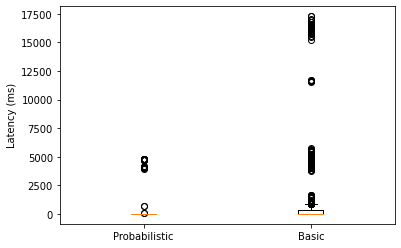

In [61]:
# Box plot for latency
plt.boxplot([success_prob['Latency'], success_basic['Latency']])
plt.xticks([1, 2], ['Probabilistic', 'Basic'])
plt.ylabel('Latency (ms)')
plt.show()

In [62]:
filtered_prob_t1 = success_prob[success_prob['threadName'].str.contains("ThreadGroup1", na=False)]
filtered_prob_t2 = success_prob[success_prob['threadName'].str.contains('ThreadGroup2', na=False)]
filtered_basic_t1 = success_basic[success_basic['threadName'].str.contains('ThreadGroup1', na=False)]
filtered_basic_t2 = success_basic[success_basic['threadName'].str.contains('ThreadGroup2', na=False)]

In [63]:
#Get only Url
url_1 = filtered_prob_t1['URL'].iloc[0]
fun_name_1 = url_1.split('/')[4]
print(f"Function 1: {fun_name_1}")
if filtered_basic_t2.size > 0:
    url_2 = filtered_basic_t2['URL'].iloc[0]
    fun_name_2 = url_2.split('/')[4]
    print(f"Function 2: {fun_name_2}")

Function 1: fib
Function 2: hash


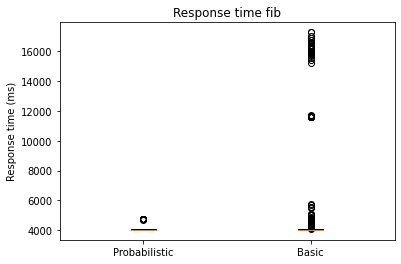

In [64]:
fig, ax = plt.subplots()
ax.boxplot([filtered_prob_t1['elapsed'], filtered_basic_t1['elapsed']])
ax.set_xticklabels(['Probabilistic', 'Basic'])
ax.set_ylabel('Response time (ms)')
ax.set_title(f'Response time {fun_name_1}')
plt.show()

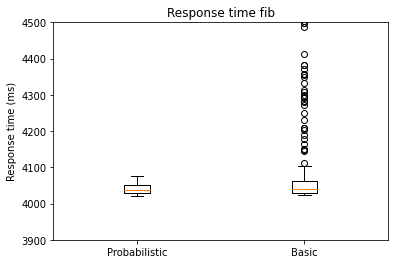

In [72]:
limit = 4500
floor = 3900

fig, ax = plt.subplots()
ax.boxplot([filtered_prob_t1['elapsed'], filtered_basic_t1['elapsed']])
ax.set_xticklabels(['Probabilistic', 'Basic'])
ax.set_ylabel('Response time (ms)')
ax.set_title(f'Response time {fun_name_1}')
ax.set_ylim(floor, limit)
plt.show()

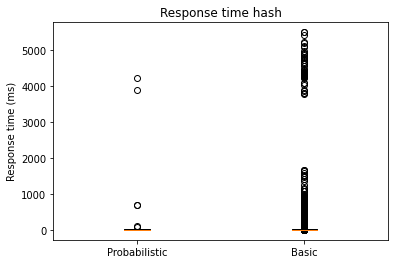

In [65]:
fig, ax = plt.subplots()
ax.boxplot([filtered_prob_t2['elapsed'], filtered_basic_t2['elapsed']])
ax.set_xticklabels(['Probabilistic', 'Basic'])
ax.set_ylabel('Response time (ms)')
ax.set_title(f'Response time {fun_name_2}')
plt.show()

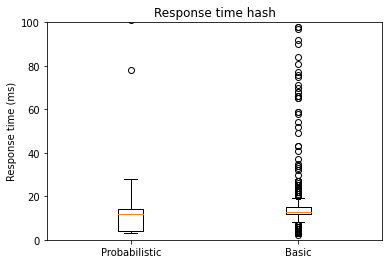

In [68]:
limit = 100

fig, ax = plt.subplots()
ax.boxplot([filtered_prob_t2['elapsed'], filtered_basic_t2['elapsed']])
ax.set_xticklabels(['Probabilistic', 'Basic'])
ax.set_ylabel('Response time (ms)')
ax.set_title(f'Response time {fun_name_2}')
ax.set_ylim(0, limit)
plt.show()